## Customer Churn Prediction



One of the most important applications of data science in the commercial sector is churn prediction. Its popularity stems from the fact that its impacts are more tangible to comprehend, and it plays a significant role in the company's overall revenues.

Churn is described as "when a client cancels a subscription to a service they have been utilizing" in business terms. People cancelling Spotify/Netflix memberships are a regular example. So, based on their utilization of the service, Churn Prediction is effectively projecting which clients are most likely to cancel a subscription, i.e. 'leave a company.'

From a business standpoint, obtaining this information is critical because recruiting new clients is generally more difficult and costly than retaining existing customers. As a result, the information acquired through Churn Prediction allows them to focus more on the customers who are most likely to leave.



<h4> Goal</h4>



- What features are significant in prediction the churn in a customer.
- To suggest measure in order to improve the retention rate with respect to customer category.



> 1 = Churned
>
>
> 0 = Not Churned



##### Importing Required Libraries



In [19]:
import pandas as pd # Data manipulation
import numpy as np # mathemetical operations
import seaborn as sns # Data visualization
import matplotlib.pyplot as plt # Data visualization
import plotly.express as px # Data visualization

from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,recall_score,plot_precision_recall_curve, plot_roc_curve, ConfusionMatrixDisplay, auc, roc_auc_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification as mc
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import graphviz

import warnings
warnings.filterwarnings("ignore")

from subprocess import check_output
import xgboost as xgb
from xgboost import XGBClassifier

##### Import Dataset



In [78]:
churndf = pd.read_csv('Churn_Modelling.csv')

In [79]:
churndf.head()#Show first 5 rows

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### Dataset Info

In [24]:
churndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        20000 non-null  int64  
 1   CustomerId       20000 non-null  int64  
 2   Surname          20000 non-null  object 
 3   CreditScore      20000 non-null  int64  
 4   Geography        20000 non-null  object 
 5   Gender           20000 non-null  object 
 6   Age              20000 non-null  int64  
 7   Tenure           20000 non-null  int64  
 8   Balance          20000 non-null  float64
 9   NumOfProducts    20000 non-null  int64  
 10  HasCrCard        20000 non-null  int64  
 11  IsActiveMember   20000 non-null  int64  
 12  EstimatedSalary  20000 non-null  float64
 13  Exited           20000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 2.1+ MB


##### Column Statistics

In [25]:
churndf.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,5000.500000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.53020,0.705500,0.515100,100090.239881,0.203700
std,2886.823503,7.193439e+04,96.650882,10.487544,2.892102,62395.845170,0.58164,0.455829,0.499784,57509.054966,0.402759
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.00000,0.000000,0.000000,11.580000,0.000000
25%,2500.750000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.00000,0.000000,0.000000,51002.110000,0.000000
50%,5000.500000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.00000,1.000000,1.000000,100193.915000,0.000000
75%,7500.250000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.00000,1.000000,1.000000,149388.247500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.00000,1.000000,1.000000,199992.480000,1.000000


##### Drop unnecessary columns

In [80]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']#Dropping three exact colums
churndf.drop(columns_to_drop, axis=1, inplace = True)#Command to drop

##### Creating a heat\-map to assess the correlation between our variables.



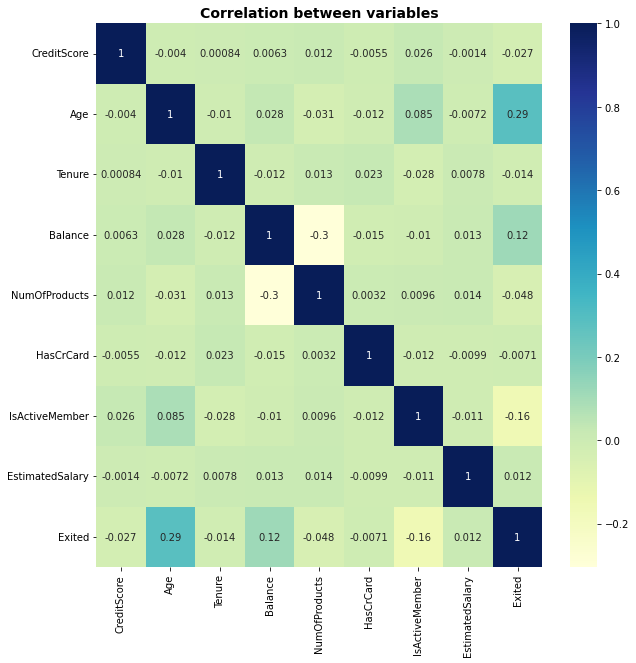

In [27]:
corr = churndf.corr()
plt.figure(figsize=(10,10))#size of our heatmap
sns.heatmap(corr, cmap='YlGnBu', annot = True).set_title('Correlation between variables',fontdict= { 'fontsize': 14, 'fontweight':'bold'});#command to create the heatmap

##### Assessing the proportions of our target value triggers to our defaults.



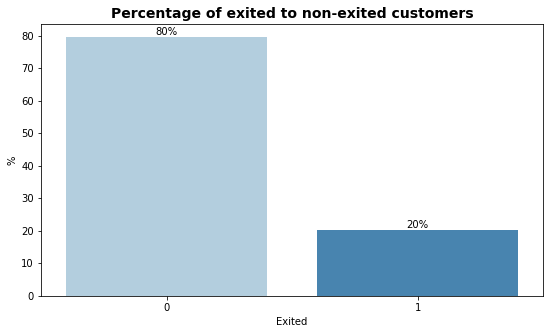

In [9]:
plt.figure(figsize=(9,5))#size of the graph
ax = sns.barplot(x='Exited', y='Exited', estimator=lambda x: len(x) / len(churndf) * 100, data=churndf, palette = 'Blues')#setting x and y to represent the info
ax.bar_label(ax.containers[0], fmt='%.f%%') #making bars to show the percentage
ax.set_ylabel('%')
ax.set_title('Percentage of exited to non-exited customers',fontdict= { 'fontsize': 14, 'fontweight':'bold'});#naming the graph

This bar graph shows our percentage of exited to non\-exited customers. As shown, we have a large percentage of exited customers along with the opposite for non\-exited customers.



##### Creating count-plots for values that wouldn't be properly visualized by box plots due to being categorical.



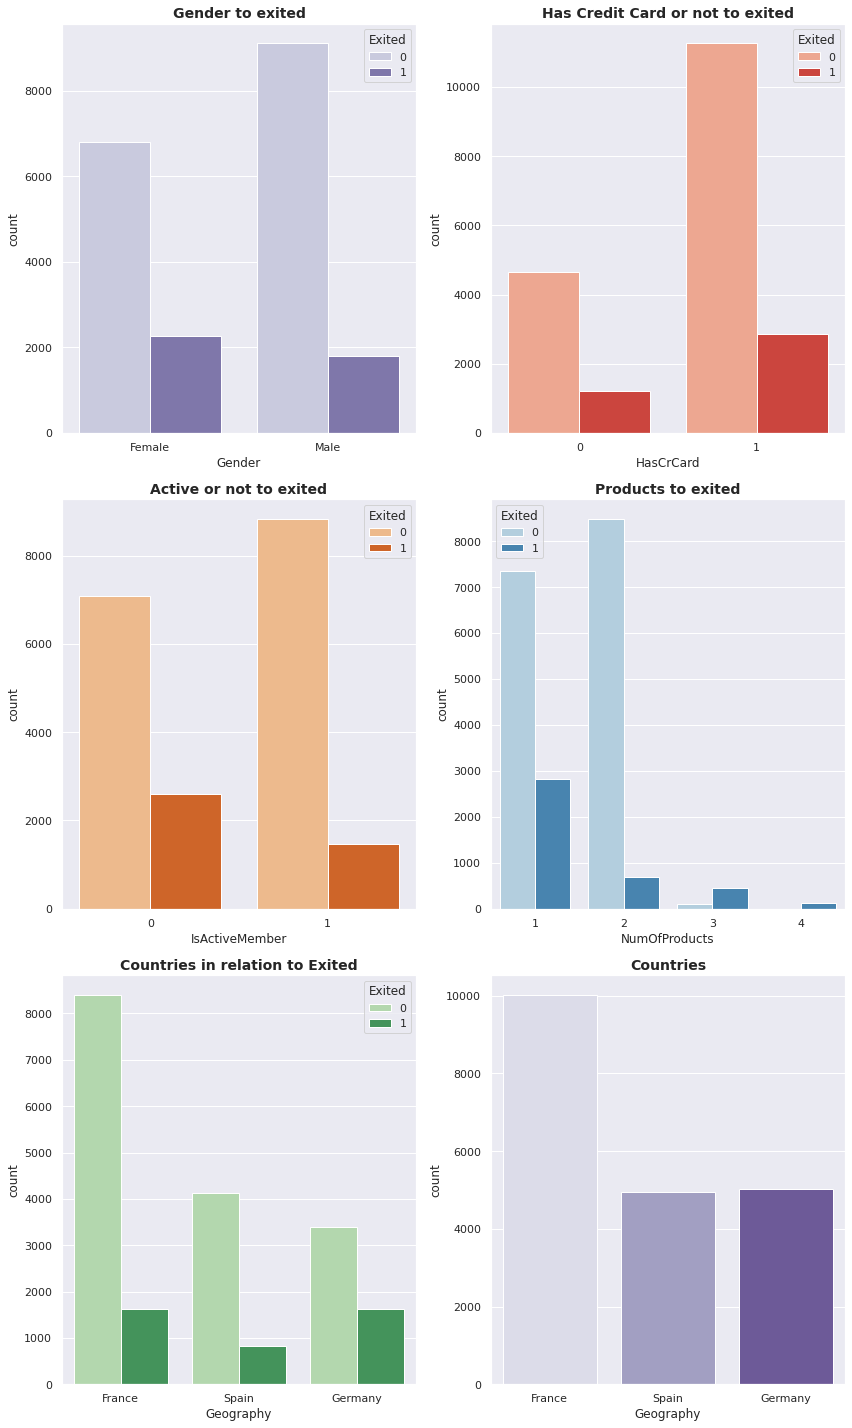

In [47]:
fig, axes = plt.subplots(3,2)#amount of plots
sns.set({'figure.figsize':(12,20)});#size of plots
#code to make plots ↓↓↓
sns.countplot(data = churndf, x = 'Gender', hue = 'Exited', ax = axes [0,0], palette = 'Purples').set_title('Gender to exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
sns.countplot(data = churndf, x = 'HasCrCard', hue = 'Exited', ax = axes [0,1], palette = 'Reds').set_title('Has Credit Card or not to exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
sns.countplot(data = churndf, x = 'IsActiveMember', hue = 'Exited', ax = axes [1,0], palette = 'Oranges').set_title('Active or not to exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
sns.countplot(data = churndf, x = 'NumOfProducts', hue = 'Exited', ax = axes [1,1], palette = 'Blues').set_title('Products to exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
sns.countplot(data=churndf, x = 'Geography', hue = 'Exited', ax = axes[2,0], palette = 'Greens').set_title('Countries in relation to Exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
sns.countplot(data = churndf, x = 'Geography', ax = axes[2,1], palette = 'Purples').set_title('Countries',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
fig.tight_layout();#print plots

In [75]:
fig = px.histogram(churndf, x='Gender', color="Exited", barmode='group')
fig.show()
fig.write_html("gender,exited.html")

In [76]:
fig = px.histogram(churndf, x = 'IsActiveMember', color = 'Exited',barmode='group')
fig.write_html("Active,Exited.html")

In [83]:
fig = px.histogram(churndf, x='Geography', color='Exited', barmode='group')
fig.show()
fig.write_html("geo,exited.html")

1\)Graph 1 shows the gender of the customer and whether or not they exited.

2\)Graph 2 shows whether or not the customer had a credit card or not when they exited.

3\)Graph 3 shows whether or not the customer that exited was an active member or not.

4\)Graph 4 shows the number of products a customer had compared to whether or not they exited.

5\)Graph 5 shows the country of the customer and whether or not the person exited.

6\)Shows the number of customers by country.



##### Creating box-plots to examine the spread of our data among multiple variables.



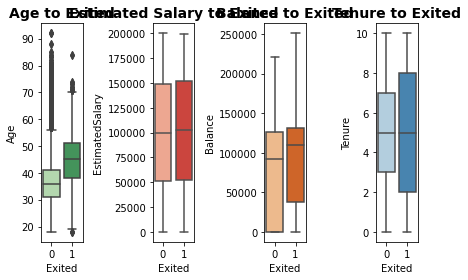

In [28]:
fig, axes = plt.subplots(1,4)#amount of plots
sns.set({'figure.figsize':(13,5)});#size of plots
#codes to create plots ↓↓↓
sns.boxplot(data = churndf, x = 'Exited', y = 'Age', ax = axes[0], palette = 'Greens').set_title('Age to Exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
sns.boxplot(data = churndf, x = 'Exited', y = 'EstimatedSalary', ax = axes [1], palette = 'Reds').set_title('Estimated Salary to Exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
sns.boxplot(data = churndf, x = 'Exited', y = 'Balance', ax = axes [2], palette = 'Oranges').set_title('Balance to Exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'})
sns.boxplot(data = churndf, x = 'Exited', y = 'Tenure', ax = axes [3], palette = 'Blues').set_title('Tenure to Exited',fontdict= { 'fontsize': 14, 'fontweight':'bold'});
fig.tight_layout() #print plots

The box plots above show the relationship between multiple factors such as age, estimated salary, balance, and tenure, to whether they exited or not.



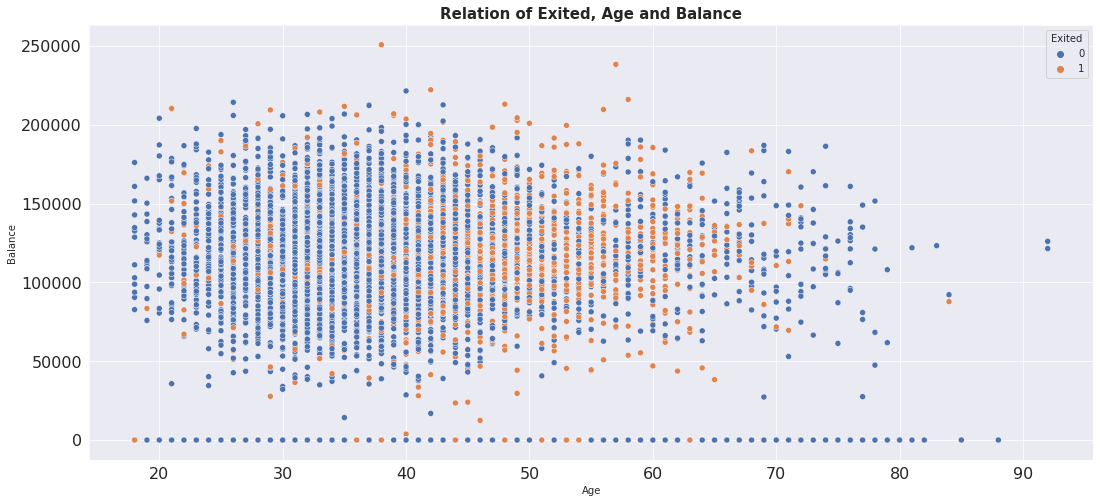

In [29]:
plt.figure(figsize=(18,8))#size of the plot
sns.scatterplot(x="Age", y="Balance", hue='Exited', data=churndf) #Importing three variables
plt.title('Relation of Exited, Age and Balance', fontsize=15, fontweight='bold') #Named and colored the plot
plt.xticks(fontsize=16)#size of x
plt.yticks(fontsize=16)#size of y
plt.show()#print the plot

In [57]:
fig = px.scatter(x="Age", y="Balance", color = "Exited", data_frame=churndf)
fig.update_layout(height=600, width=800, title_text="Scatterplot Coralation map of Age, Balance, and Churned")
fig.show()
fig.write_html("Scatplt,Age,Bal,Chur.html")

SyntaxError: cannot assign to function call (2435112235.py, line 1)

This scatter plot shows the relationship between the age and balance of the customers, and how that affects the number of people that have exited. 



##### Summary

- The dataset we chose includes multiple variables that describe customers at a bank. Our target is finding whether or not a customer will leave the bank, and our variable for that is Exited, with a value of 1 meaning that the customer has left, and a value of 0 meaning that the customer remains.
- Through our analysis of the correlation between variables, we found that all of the ones that we didn't remove played a small role in predicting whether or not the customer has exited or will exit \(as seen in our heat\-map\).
- Some of the variables we chose to analyze through exploratory data analysis were the age of the customer, their estimated salary, balance, tenure,
  gender, which country they were from, whether they had a credit card or not, how active they were, and the number of products they were utilizing from the bank.



#### Turning Categorical String columns into Numericals Classes



In [31]:
dummies = pd.get_dummies(churndf["Gender"])#making it show male as 0, female as 1
dummies.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [32]:
churndf["Gender"] = dummies["Male"]#? idk what we did here
churndf.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [33]:
dummies2 = pd.get_dummies(churndf["Geography"])#made it identify each country
dummies2.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [34]:
#making it to identify those countries as numbers
churndf['France'] = dummies2['France']
churndf['Spain'] = dummies2['Spain']
churndf['Germany'] = dummies2['Germany']

In [35]:
churndf.drop(['Geography'],axis = 1, inplace = True)#idk

In [36]:
X = churndf.loc[:, churndf.columns != "Exited"]
Y = churndf['Exited']

### Splitting the Data



In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify = Y)

In [38]:
scaler = StandardScaler()

num_cols = ['EstimatedSalary','Balance','Age','CreditScore']

for i in num_cols:
    x = scaler.fit(x_train[[i]])
    x_train[i] = x.transform(x_train[[i]])
    x_test[i] = x.transform(x_test[[i]])

### Modelling



#### **Logistic Regression**

This model estimates the probability of an event occurring based on a given set of data. In this case, given the different features in our dataset, this model will estimate the probability of people exiting or not exiting from the bank.



In [39]:
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [40]:
parameters = {
    'penalty' : ['l1','l2','elasticnet'], 
    'C'       : [0.001,0.01,0.1,1,10,100],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],}

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
log = LogisticRegression()
log_cv=GridSearchCV(log,grid,cv=10)
log_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",log_cv.best_params_)
print("accuracy :",log_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.8106875


In [41]:
y_pred_log = log_cv.predict(x_test)
y_pred_log

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
recall_score(y_test, y_pred_log)

0.2098159509202454

<AxesSubplot:>

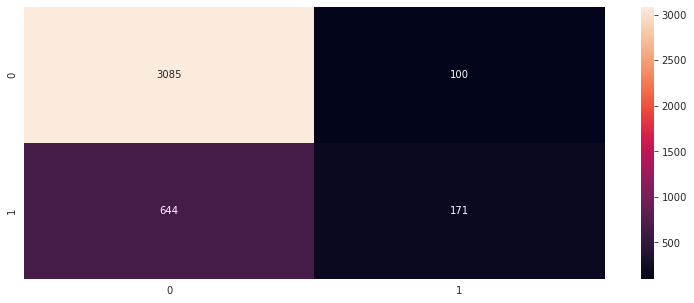

In [43]:
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='g')

In [44]:
log_reg_cf = confusion_matrix(y_test, y_pred_log)

In [45]:
log_reg_cf

array([[3085,  100],
       [ 644,  171]])

In [46]:
fig = px.imshow(log_reg_cf,text_auto=True, labels=dict(x="Predicted Values", y="Actual Values"), 
                x=['Not Churn','Churn'],
                y=['Not Churn','Churn'],
                color_continuous_scale="Blues")
fig.update_layout(height=600, width=800, title_text="Confusion Matrix: Support Vector Machine")
fig.show()
fig.write_html("log_reg_cf.html")

In [31]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      3185
           1       0.63      0.21      0.31       815

    accuracy                           0.81      4000
   macro avg       0.73      0.59      0.60      4000
weighted avg       0.79      0.81      0.77      4000



#### Decision Tree Classifier



In [31]:
def dtree_grid_search(y_test,y_pred_dt,nfolds):
    #create a dictionary of all values we want to test
    param_grid = {"max_features": [1,3,4,5,7,8,9], "min_samples_leaf": [1,3,4,5,6,7],'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(x_train, y_train)
    return dtree_gscv.best_params_

In [32]:
treeClassifier = DecisionTreeClassifier(criterion = "gini", max_depth = 14, max_features = 9, min_samples_leaf = 1 )
treeClassifier.fit(x_train, y_train)
y_pred_dt = treeClassifier.predict(x_test)

In [33]:
y_pred_dt = treeClassifier.predict(x_test)

In [0]:
dtree_grid_search(y_test,y_pred_dt,6)

In [0]:
# treeClassifier = DecisionTreeClassifier(criterion = "gini", max_depth = 14, max_features = 9, min_samples_leaf = 1 )

data = tree.export_graphviz(treeClassifier, class_names=['0', '1'], out_file=None)
graph = graphviz.Source(data)
graph

In [61]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      3185
           1       0.83      0.73      0.78       815

    accuracy                           0.92      4000
   macro avg       0.88      0.85      0.86      4000
weighted avg       0.91      0.92      0.91      4000



<AxesSubplot:>

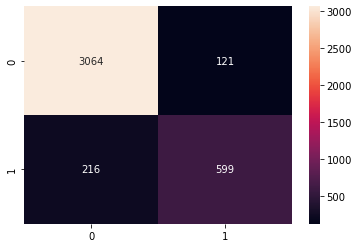

In [62]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='g')

This model uses the decision tree to predict customer churn. Through the use of gridsearchcv I was able to refine the model and make it more accurate.


#### **`Gradient Boosting Classifier`**



In [0]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"]}

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.best_params_)

In [0]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)

In [0]:
gradient_booster.fit(x_train,y_train)

In [0]:
print(classification_report(y_test,gradient_booster.predict(x_test)))

#### Random Forest Classifier



We use RFC in order to address the issue of overfitting that a single tree may exhibit by using multiple decision trees to vote on the most common classification. They're generally more accurate, though also more memory\-consuming than single decision trees.



In [41]:
clf = rfc(n_estimators = 100)
clf.fit(x_train, y_train)

RandomForestClassifier()

In [42]:
y_pred_clf = clf.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred_clf))

ACCURACY OF THE MODEL:  0.971


<AxesSubplot:>

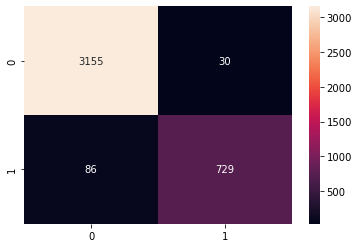

In [45]:
sns.heatmap(confusion_matrix(y_test, y_pred_clf), annot=True, fmt='g')

In [46]:
recall_score(y_test, y_pred_clf)

0.894478527607362

In [47]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3185
           1       0.96      0.89      0.93       815

    accuracy                           0.97      4000
   macro avg       0.97      0.94      0.95      4000
weighted avg       0.97      0.97      0.97      4000



###### GridSearchCV



In [48]:
# Number of trees in random forest
n_estimators = [100,200,300]
# Maximum number of levels in tree
max_depth = [6,10,20]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': ['sqrt'],
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [49]:
CV_rfc = GridSearchCV(estimator = clf, param_grid=param_grid, cv= 5)

In [61]:
CV_rfc.fit(x_train, y_train)

In [0]:
y_pred_rfgs = CV_rfc.predict(x_test)

In [0]:
print(accuracy_score(y_pred_rfgs, y_test))

Recall : 0.90


In [79]:
print(classification_report(y_test, y_pred_rfgs))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3185
           1       0.96      0.90      0.92       815

    accuracy                           0.97      4000
   macro avg       0.96      0.94      0.95      4000
weighted avg       0.97      0.97      0.97      4000



In [0]:
sns.heatmap(confusion_matrix(y_test, y_pred_rfgs), annot=True, fmt='g')

#### **XGboost**



In [0]:
xgbooster = XGBClassifier()

In [0]:
xgbooster.fit(x_train, y_train)

In [0]:
y_xgboost = xgbooster.predict(x_test)

In [0]:
print(classification_report(y_test, y_xgboost))

In [0]:
xgbooster = XGBClassifier()

paramatersxg = {
    'max_depth': [3,6,8],
    'n_estimators': [75,100,150],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0.10,3.2,12.8],
    'min_child_weight': [1, 5],
    'subsample': [0.6, 0.8],
}

grid_search = GridSearchCV(
    estimator=xgbooster,
    param_grid=paramatersxg,
    cv = 3,
    verbose=True
)

In [0]:
grid_search.fit(x_train, y_train)

In [0]:
y_test_xg = grid_search.predict(x_test)

In [0]:
print(classification_report(y_test, y_test_xg))

recall: 0.36


#### Support Vector Classifier



In [0]:
from sklearn import svm

param_grid = {'C': [0.001,0.01,0.1, 1, 10],
              'gamma': [1, 0.01, 0.001],
              'kernel': ['polynomial','rbf']}
 

grid = GridSearchCV(svm.SVC(), param_grid, verbose = 3)
grid.fit(x_train, y_train)

In [0]:
svm_hyper_pred = grid.predict(x_test)
print(classification_report(svm_hyper_pred,y_test))

### Model Evaluation \- Recall:

- SVM: 0.93
- Random Forest: 0.90
- Decision Tree: 0.73
- XGboost: 0.65
- Gradient Boosting: 0.50
- Log Reg: 0.21
- KNN: 0.16

